In [172]:
# load pandas, numpy, seaborn, matplotlib, and statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [205]:
pd.set_option("display.precision",10)

In [264]:
# import 5 datasets into pandas dataframes
coaches = pd.read_csv('Coaches9.csv')
donations = pd.read_csv('Donations.csv')
graduation = pd.read_csv('Graduation Rates.csv')
records = pd.read_csv('HistoricalRecords.csv')
stadiums = pd.read_csv('Stadiums.csv')

In [265]:
# drop redundant Conference columns
graduation.drop('Conference', axis=1, inplace=True)
records.drop('Conference', axis=1, inplace=True)
stadiums.drop('Conference', axis=1, inplace=True)

In [266]:
# merge all data frames together to create a wider data set
schools = pd.merge(coaches, graduation, how = 'left', on=['School'])
schools = pd.merge(schools, records, how = 'left', on=['School'])
schools = pd.merge(schools, stadiums, how = 'left', on=['School'])
schools = pd.merge(schools, donations, how = 'left', on=['School'])

In [267]:
# drop unnecessary columns that will not be used
schools.drop(['TotalPay', 'Bonus', 'BonusPaid', 'Buyout', 'AssistantPay', 'Cohort Year', 'Sport', 'State'], axis=1, inplace=True)

In [268]:
syracuse = schools.iloc[102,:].to_string

In [269]:
# remove rows with NAs
schools = schools.dropna()

In [270]:
# check data types of remaining columns
schools.dtypes

School               object
Conference           object
Coach                object
SchoolPay            object
GSR                   int64
FGR                 float64
Total Games         float64
ATWinPercentage     float64
19WinPercentage     float64
Capacity            float64
Annual Donations    float64
dtype: object

In [271]:
# convert SchoolPay from object to a float
schools['SchoolPay'] = schools['SchoolPay'].str.replace(',', '')
schools['SchoolPay'] = schools['SchoolPay'].str.replace('$', '')
schools['SchoolPay'] = schools.SchoolPay.astype(float)

In [278]:
# rename columns likely to cause problems
schools.rename(columns = {'Total Games':'TotalGames'}, inplace = True)
schools.rename(columns = {'Annual Donations':'AnnualDonations'}, inplace = True)
schools.rename(columns = {'19WinPercentage' : 'WinPercentage19'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

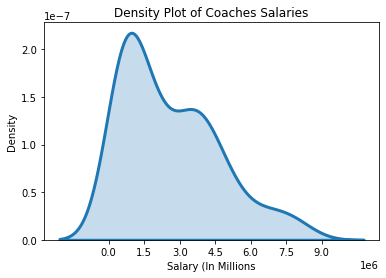

In [316]:
sns.distplot(schools['SchoolPay'], hist=False, kde=True,
             kde_kws = {'shade': True, 'linewidth': 3})
plt.xticks([0, 1500000, 3000000, 4500000, 6000000, 7500000, 9000000])
plt.title('Density Plot of Coaches Salaries')
plt.xlabel('Salary (In Millions')
plt.ylabel('Density')

In [279]:
# creating new data frame with average donations by conference to supplement missing data for Syracuse
avgdonations = schools.groupby('Conference', as_index=False)['AnnualDonations'].mean()
avgdonations

,Conference,AnnualDonations
0,AAC,8.7470757500e+06
1,ACC,3.0606997714e+07
2,Big 12,3.3119054750e+07
3,Big Ten,2.2980998308e+07
4,C-USA,4.4918385556e+06
5,Ind.,1.4212850000e+06
6,MAC,1.9867474000e+06
7,Mt. West,7.0797344444e+06
8,Pac-12,1.9206991300e+07
9,SEC,3.9907214583e+07


In [280]:
# store correlations values between variables
correlation = schools.corr()

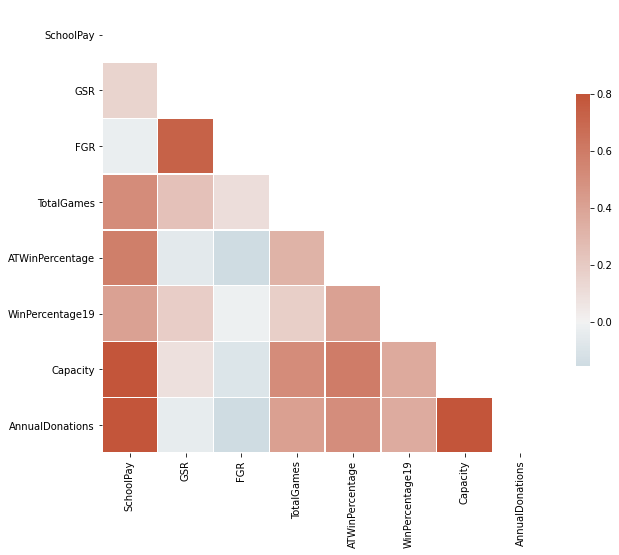

In [281]:
# Create correlation heat map
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [285]:
# specify a model
smodel = str('SchoolPay ~ Conference + GSR + FGR + TotalGames + ATWinPercentage + WinPercentage19 + Capacity + AnnualDonations')

In [287]:
syracuse

<bound method Series.to_string of School                 Syracuse
Conference                  ACC
Coach               Dino Babers
SchoolPay           $2,401,206 
GSR                          88
FGR                          78
Total Games                1331
ATWinPercentage     0.563110443
19WinPercentage           0.417
Capacity                  49250
Annual Donations            NaN
Name: 102, dtype: object>

In [286]:
model_fit = smf.ols(smodel, data = schools).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     25.72
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           2.58e-24
Time:                        02:15:39   Log-Likelihood:                -1377.6
No. Observations:                  92   AIC:                             2791.
Df Residuals:                      74   BIC:                             2837.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.92

In [291]:
print('\nRecommended salary for Syracuse coach: $',\
      round(model_fit.params[1],0)+(round(model_fit.params[11],0)*88)+(round(model_fit.params[12],0)*78)+(round(model_fit.params[13],0)*1331)+(round(model_fit.params[14],0)*0.563110443)+(round(model_fit.params[15],0)*0.417)+(round(model_fit.params[16],0)*49250)+(round(model_fit.params[17],0)*30606998))
print('\nRecommended salary for Syracuse coach, if Syracuse moved to Big Ten: $',\
      round(model_fit.params[3],0)+(round(model_fit.params[11],0)*88)+(round(model_fit.params[12],0)*78)+(round(model_fit.params[13],0)*1331)+(round(model_fit.params[14],0)*0.563110443)+(round(model_fit.params[15],0)*0.417)+(round(model_fit.params[16],0)*49250)+(round(model_fit.params[17],0)*30606998))
print('\nActual salary for Syracuse coach: $ 2401206')


Recommended salary for Syracuse coach: $ 5514518.94659377

Recommended salary for Syracuse coach, if Syracuse moved to Big Ten: $ 5747455.94659377

Actual salary for Syracuse coach: $ 2401206


In [294]:
# Drop TotalGames, FGR, and WinPercentage19 from model and re-run
smodel = str('SchoolPay ~ Conference + GSR + ATWinPercentage + Capacity + AnnualDonations')
model_fit = smf.ols(smodel, data = schools).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     31.53
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           3.86e-26
Time:                        02:22:48   Log-Likelihood:                -1378.7
No. Observations:                  92   AIC:                             2787.
Df Residuals:                      77   BIC:                             2825.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.22

In [295]:
print('\nRecommended salary for Syracuse coach: $',\
      round(model_fit.params[1],0)+(round(model_fit.params[11],0)*88)+(round(model_fit.params[12],0)*0.563110443)+(round(model_fit.params[13],0)*49250)+(round(model_fit.params[14],0)*8747075.75))
print('\nRecommended salary for Syracuse coach, if Syracuse moved to Big Ten: $',\
      round(model_fit.params[3],0)+(round(model_fit.params[11],0)*88)+(round(model_fit.params[12],0)*0.563110443)+(round(model_fit.params[13],0)*49250)+(round(model_fit.params[14],0)*8747075.75))
print('\nActual salary for Syracuse coach: $ 2401206')


Recommended salary for Syracuse coach: $ 5864614.53101647

Recommended salary for Syracuse coach, if Syracuse moved to Big Ten: $ 6111470.53101647

Actual salary for Syracuse coach: $ 2401206


In [299]:
# Drop both Graduation Rates
smodel = str('SchoolPay ~ Conference + TotalGames + ATWinPercentage + WinPercentage19 + Capacity + AnnualDonations')
model_fit = smf.ols(smodel, data = schools).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     28.81
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           2.87e-25
Time:                        02:24:58   Log-Likelihood:                -1379.1
No. Observations:                  92   AIC:                             2790.
Df Residuals:                      76   BIC:                             2830.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.44

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [300]:
print('\nRecommended salary for Syracuse coach: $',\
      round(model_fit.params[1],0)+(round(model_fit.params[11],0)*1331)+(round(model_fit.params[12],0)*0.563110443)+(round(model_fit.params[13],0)*0.417)+(round(model_fit.params[14],0)*49250)+(round(model_fit.params[15],0)*30606998))
print('\nRecommended salary for Syracuse coach, if Syracuse moved to Big Ten: $',\
      round(model_fit.params[3],0)+(round(model_fit.params[11],0)*1331)+(round(model_fit.params[12],0)*0.563110443)+(round(model_fit.params[13],0)*0.417)+(round(model_fit.params[14],0)*49250)+(round(model_fit.params[15],0)*30606998))
print('\nActual salary for Syracuse coach: $ 2401206')


Recommended salary for Syracuse coach: $ 4010300.631735692

Recommended salary for Syracuse coach, if Syracuse moved to Big Ten: $ 4302177.631735692

Actual salary for Syracuse coach: $ 2401206


In [303]:
# Drop both Graduation Rates, TotalGames, and ATWinPercentage
smodel = str('SchoolPay ~ Conference + WinPercentage19 + Capacity + AnnualDonations')
model_fit = smf.ols(smodel, data = schools).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     32.46
Date:                Sun, 31 Jan 2021   Prob (F-statistic):           4.18e-26
Time:                        02:28:41   Log-Likelihood:                -1381.0
No. Observations:                  92   AIC:                             2790.
Df Residuals:                      78   BIC:                             2825.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.92

In [304]:
print('\nRecommended salary for Syracuse coach: $',\
      round(model_fit.params[1],0)+(round(model_fit.params[11],0)*0.417)+(round(model_fit.params[12],0)*49250)+(round(model_fit.params[13],0)*30606998))
print('\nRecommended salary for Syracuse coach, if Syracuse moved to Big Ten: $',\
      round(model_fit.params[3],0)+(round(model_fit.params[11],0)*0.417)+(round(model_fit.params[12],0)*49250)+(round(model_fit.params[13],0)*30606998))
print('\nActual salary for Syracuse coach: $ 2401206')


Recommended salary for Syracuse coach: $ 3067088.002

Recommended salary for Syracuse coach, if Syracuse moved to Big Ten: $ 3312191.002

Actual salary for Syracuse coach: $ 2401206
